1. Explore Google Trends https://trends.google.com/ . Find a topic of interest to you with
more than a year of trend data, and export it.
a. Import the data into a pandas dataframe
b. Decide whether ARMA, ARIMA, or SARIMA makes more sense for the dataset
c. Run either an ARMA, ARIMA, or SARIMA on it
d. Explain the results
e. Discuss your findings with your group and explain what trend someone else
chose and why they chose the model they did

In [3]:
import pandas as pd
#import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
from statsmodels.tsa.arima_model import ARMA

#def parser(x):
 #   return datetime.strptime(x, '%Y-%m-%d')

df = pd.read_csv("multiTimeline (2).csv", index_col=[0], parse_dates=[0])
#df['Date'] = pd.to_datetime(df['Date']) # convert date column to DateTime
df.head()

,Coronavirus: (United States)
Week,
2020-12-06,100
2020-12-13,92
2020-12-20,93
2020-12-27,86
2021-01-03,79


In [5]:
df.isnull().sum()

Coronavirus: (United States)    0
dtype: int64

In [6]:
df.dtypes

Coronavirus: (United States)    int64
dtype: object

In [7]:
df.index

DatetimeIndex(['2020-12-06', '2020-12-13', '2020-12-20', '2020-12-27',
               '2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21',
               '2021-02-28', '2021-03-07', '2021-03-14', '2021-03-21',
               '2021-03-28', '2021-04-04', '2021-04-11', '2021-04-18',
               '2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13',
               '2021-06-20', '2021-06-27', '2021-07-04', '2021-07-11',
               '2021-07-18', '2021-07-25', '2021-08-01', '2021-08-08',
               '2021-08-15', '2021-08-22', '2021-08-29', '2021-09-05',
               '2021-09-12', '2021-09-19', '2021-09-26', '2021-10-03',
               '2021-10-10', '2021-10-17', '2021-10-24', '2021-10-31',
               '2021-11-07', '2021-11-14', '2021-11-21', '2021-11-28'],
              dtype='datetime64[ns]', name='Week', freq=None)

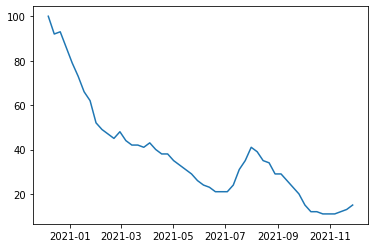

In [8]:
plt.plot(df.index, df['Coronavirus: (United States)'])

In [10]:
df.loc["2021-3"]

,Coronavirus: (United States)
Week,
2021-03-07,44
2021-03-14,42
2021-03-21,42
2021-03-28,41


In [11]:
df.resample('W').mean()

,Coronavirus: (United States)
Week,
2020-12-06,100.0
2020-12-13,92.0
2020-12-20,93.0
2020-12-27,86.0
2021-01-03,79.0
2021-01-10,73.0
2021-01-17,66.0
2021-01-24,62.0
2021-01-31,52.0


<AxesSubplot:xlabel='Week'>

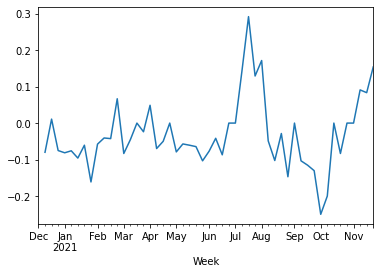

In [12]:
#to transform a stationary process
df_new=df['Coronavirus: (United States)'].pct_change()
df_new.plot()

In [35]:
df_new.head()

Week
2020-12-06         NaN
2020-12-13   -0.080000
2020-12-20    0.010870
2020-12-27   -0.075269
2021-01-03   -0.081395
Name: Coronavirus: (United States), dtype: float64

In [14]:
# Integrated of order 1 because We are taking 1-lag(one-time period difference) 
df_new_diff = df_new.diff(periods=1)

In [15]:
# Removing NaN values
df_new_diff = df_new_diff[2:]
df_new_diff.head()

Week
2020-12-20    0.090870
2020-12-27   -0.086138
2021-01-03   -0.006127
2021-01-10    0.005446
2021-01-17   -0.019941
Name: Coronavirus: (United States), dtype: float64

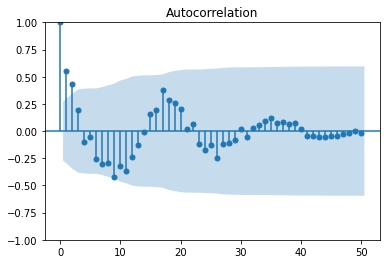

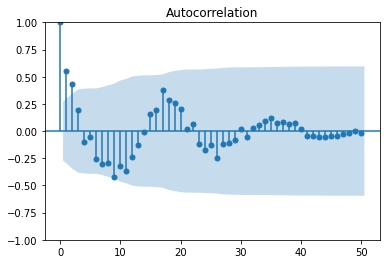

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_new, lags = 50, missing='drop')

In [52]:
# Converting series to stationary
df_new.shift(1)

Week
2020-12-06         NaN
2020-12-13         NaN
2020-12-20   -0.080000
2020-12-27    0.010870
2021-01-03   -0.075269
2021-01-10   -0.081395
2021-01-17   -0.075949
2021-01-24   -0.095890
2021-01-31   -0.060606
2021-02-07   -0.161290
2021-02-14   -0.057692
2021-02-21   -0.040816
2021-02-28   -0.042553
2021-03-07    0.066667
2021-03-14   -0.083333
2021-03-21   -0.045455
2021-03-28    0.000000
2021-04-04   -0.023810
2021-04-11    0.048780
2021-04-18   -0.069767
2021-04-25   -0.050000
2021-05-02    0.000000
2021-05-09   -0.078947
2021-05-16   -0.057143
2021-05-23   -0.060606
2021-05-30   -0.064516
2021-06-06   -0.103448
2021-06-13   -0.076923
2021-06-20   -0.041667
2021-06-27   -0.086957
2021-07-04    0.000000
2021-07-11    0.000000
2021-07-18    0.142857
2021-07-25    0.291667
2021-08-01    0.129032
2021-08-08    0.171429
2021-08-15   -0.048780
2021-08-22   -0.102564
2021-08-29   -0.028571
2021-09-05   -0.147059
2021-09-12    0.000000
2021-09-19   -0.103448
2021-09-26   -0.115385
2021-1

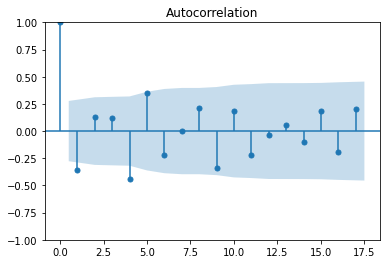

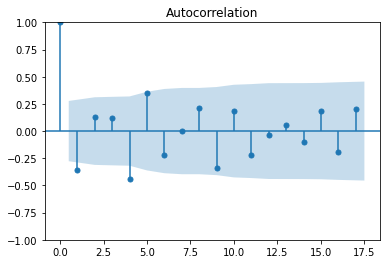

In [18]:
plot_acf(df_new_diff)

<AxesSubplot:xlabel='Week'>

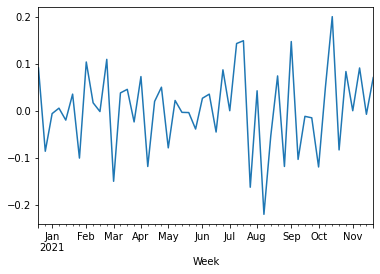

In [19]:
df_new_diff.plot()

In [36]:
x = df.values
x.size

52

In [37]:
# 80% of my data for training and 20% of the data is for testing
train = x[0:41] # 41 data as train data
test = x[41:]  #11 data as test data
predictions = []

In [22]:
# Autoreggresive AR Model

In [38]:
#from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# train the forcasting model
model_ar = AutoReg(train, lags=2)
model_ar_fit = model_ar.fit() 

In [39]:
predictions = model_ar_fit.predict(start=0, end=41)

In [40]:
test

array([[23],
       [20],
       [15],
       [12],
       [12],
       [11],
       [11],
       [11],
       [12],
       [13],
       [15]], dtype=int64)

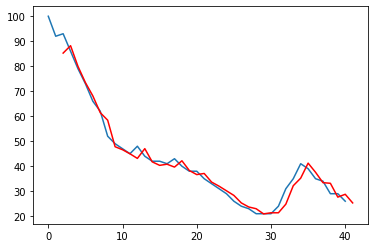

In [41]:
plt.plot(train)
plt.plot(predictions, color = 'red')

In [42]:
# ARIMA Model : Combination of three techniques which is auto regressive, integrated and moving 
# average

In [43]:
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA

In [51]:
# p,d,q p = periods taken for autoregressive model,
# d- integrated order, difference
# q - periods in moving average model
model_arima = auto_arima(train, order=(1,1,1))
model_arima_fit = model_arima.fit()
#model_arima.summary()

TypeError: fit() missing 1 required positional argument: 'y'

In [50]:
predictions = model_arima_fit(steps = 11)
predictions

TypeError: 'numpy.ndarray' object is not callable

What is a fourier transform? Perform one on y = np.cos(x/2), and both show (with code)
and explain the key elements.

In [243]:
import numpy as np
from scipy.fftpack import fft, ifft
from scipy.fftpack import dct
from scipy.fftpack import dct,idct

x=np.array([4., 3., 5., 10., 5., 3.])

#Applying the fft function
y = fft(x)

yinv = ifft(y)

time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + 0.5 *np.random.randn(time_vec.size)

sample_freq = fftpack.fftfreq(sig.size, d = time_step)
sig_fft = fftpack.fft(sig)

Amplitude = np.abs(sig_fft)
power = Amplitude**2
Angle = np.angle(sig_fft)

Amp_freq = np.array([Amplitude, sample_freq])
Amp_position = Amp_freq[0,:].argmax()

peak_freq = Amp_freq[1, Amp_position]
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq]=0
filtered_sig = fftpack.ifft(high_freq_fft)
filtered_sig



array([-1.52201737e-02+0.00000000e+00j,  1.00306896e-02+1.14352972e-16j,
        3.52869899e-02-6.66133815e-19j,  6.05326977e-02+1.15574217e-16j,
        8.57517927e-02+0.00000000e+00j,  1.10928274e-01+0.00000000e+00j,
        1.36046171e-01-5.69544412e-17j,  1.61089552e-01+5.76205750e-17j,
        1.86042534e-01-8.88178420e-19j,  2.10889297e-01+5.57331958e-17j,
        2.35614089e-01-1.99840144e-18j,  2.60201236e-01+5.92859095e-17j,
        2.84635156e-01-8.88178420e-19j,  3.08900366e-01-8.88178420e-19j,
        3.32981493e-01-1.15019105e-16j,  3.56863280e-01+0.00000000e+00j,
        3.80530601e-01-5.68434189e-17j,  4.03968468e-01+6.08402217e-17j,
        4.27162041e-01+5.86197757e-17j,  4.50096635e-01+1.14575016e-16j,
        4.72757733e-01+1.77635684e-18j,  4.95130992e-01+1.11910481e-16j,
        5.17202254e-01-5.41788836e-17j,  5.38957556e-01+6.03961325e-17j,
        5.60383135e-01-5.59552404e-17j,  5.81465438e-01+1.74971149e-16j,
        6.02191134e-01+8.88178420e-19j,  6.22547119

In [204]:
import numpy as np
from scipy import fftpack
from scipy.fftpack import dct

#creating a signal with a time_step of 0.05 seconds
time_step = 0.05
time_vec = np.arange(0, 10, time_step) 
period = 2
cosig = (np.cos(2*np.pi*time_vec/period)+0.5*np.random.randn(time_vec.size))
#print(cosig.size)

sample_freq = fftpack.fftfreq(cosig.size, d = time_step)
cosig_fft = fftpack.fft(cosig)
#print(cosig_fft)

C:\Users\rsagu\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


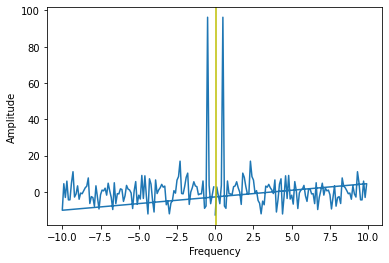

In [199]:
plt.plot(sample_freq,cosig_fft)
plt.axvline(1/(6*np.pi),c='y')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()
plt.show()

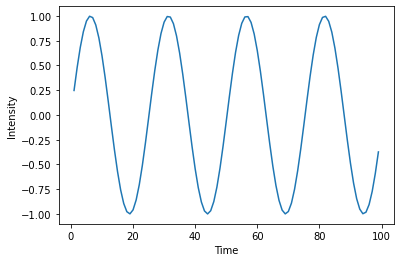

In [240]:
from scipy import signal

x = np.arange(1, 100, 1)
y = np.sin(x/4)
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.show()

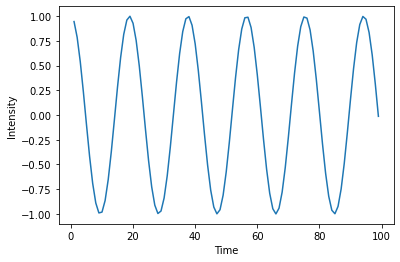

In [242]:
from scipy import signal

x = np.arange(1, 100, 1)
y = np.cos(x/3)
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.show()

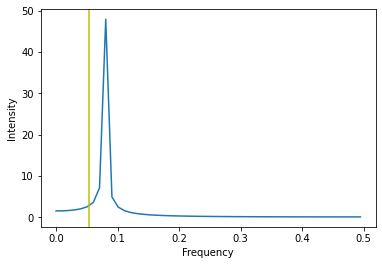

In [196]:
#power spectral density
psd = np.abs(np.fft.rfft(y))
freqs = np.fft.rfftfreq(len(y))
plt.plot(freqs,psd)
#amplitude
plt.axvline(1/(6*np.pi),c='y')
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.show()